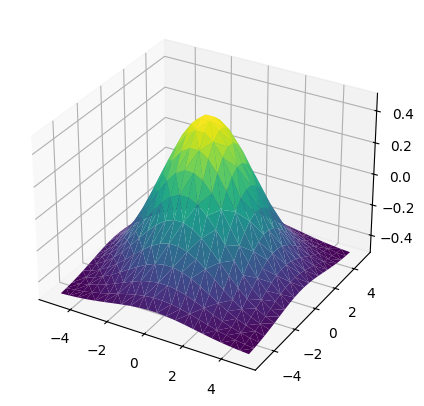

In [1]:
import matplotlib.pyplot as plt
from tools import generate_gaussian_data

X, y = generate_gaussian_data(500)

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(X.T[0], X.T[1], y.T.ravel(), cmap='viridis')
plt.show()

### 1. Vary the number of nodes in the hidden layer from 1 to 25 (every few) and try to observe any trends. What happens when you have very few (less than 5) or very many (more than 20) hidden nodes? Can you explain your observations? Try to make a model comparison - what error estimates and how would you compare them to identify the ”best” model?

In [2]:
from tools import (
    ModelResult, load_MLP_regressor, split_dataset, evaluate
)

n_epochs = 10
model_results_1 = {}

for i in range(1, 26, 1): 
    model_results_1[i] = []
    print(f"\nTraining network with n_nodes = {i}")

    for j in range(10):
        model = load_MLP_regressor(n_nodes=i)

        X_train, X_val, y_train, y_val = split_dataset(X, y)
        model.fit(X_train, y_train, epochs=n_epochs, batch_size=32, verbose=0)

        mse_train, mse_val, mse_overall = evaluate(
            model, X, y, X_train, X_val, y_train, y_val
        )
        print(f"MSE Train: {mse_train:.5f} \nMSE Val: {mse_val:.5f} \nMSE Overall: {mse_overall:.5f}")
        model_results_1[i].append(
            ModelResult(
                model=model,
                mse_train=mse_train, 
                mse_val=mse_val, 
                mse_overall=mse_overall
            )   
        )


Training network with n_nodes = 1


c:\SUTD\KTH\DD2437 Artificial Neural Networks and Deep Architectures\Code\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0758 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1047 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0987 
MSE Train: 0.08936 
MSE Val: 0.09339 
MSE Overall: 0.09177
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0758 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2032 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1742 
MSE Train: 0.08938 
MSE Val: 0.14874 
MSE Overall: 0.12495
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13.9255
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1181 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.8985 
MSE Train: 15.98672 
MSE Val: 5.53206 
MSE Overall: 9.72257
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4595 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8720 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5715 
MSE Train: 0.43519 
MSE Val: 1.39117 
MSE Overall: 1.00799
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0758 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1047 
16/

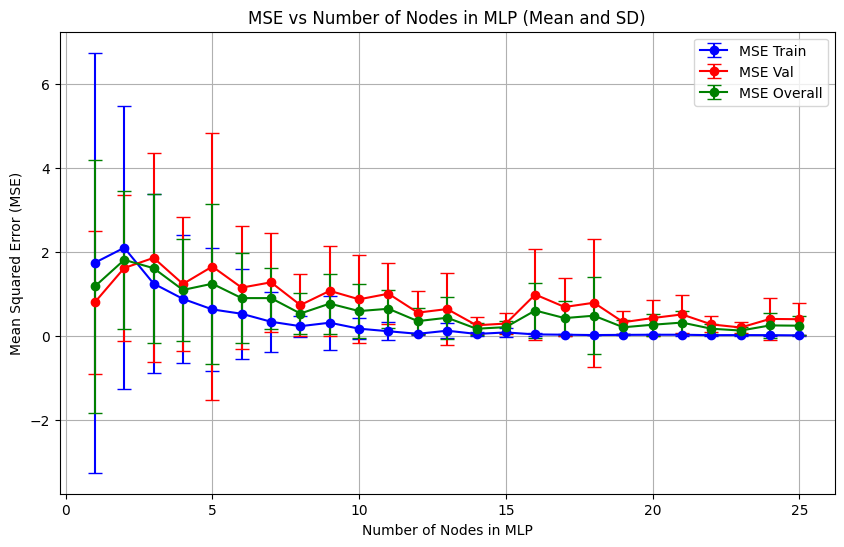

In [3]:
from tools import plot_mse_results
import statistics

nodes = list(range(1, 26, 1))
list_avg_mse_train = [statistics.mean([model_result.mse_train for model_result in model_results_1[i]]) for i in nodes]
list_avg_mse_val = [statistics.mean([model_result.mse_val for model_result in model_results_1[i]]) for i in nodes]
list_avg_mse_overall = [statistics.mean([model_result.mse_overall for model_result in model_results_1[i]]) for i in nodes]

list_stdev_mse_train = [statistics.stdev([model_result.mse_train for model_result in model_results_1[i]]) for i in nodes]
list_stdev_mse_val = [statistics.stdev([model_result.mse_val for model_result in model_results_1[i]]) for i in nodes]
list_stdev_mse_overall = [statistics.stdev([model_result.mse_overall for model_result in model_results_1[i]]) for i in nodes]

plot_mse_results(
    x_axis="nodes",
    list_avg_mse_train=list_avg_mse_train,
    list_avg_mse_val=list_avg_mse_val,
    list_avg_mse_overall=list_avg_mse_overall,
    list_stdev_mse_train=list_stdev_mse_train,
    list_stdev_mse_val=list_stdev_mse_val,
    list_stdev_mse_overall=list_stdev_mse_overall
)

### 2. For the selected ”best” model, run experiments with varying number of the training samples, e.g. from 80% down to 20% of all the dataset.

We choose the model with 8 nodes for the following reasons: 
1. Based on the elbow method, between 5 to 10 nodes seems like an optimal choice that balances between overfitting and underfitting. 
2. 8 nodes is chosen because there is a low distance between the training and validation MSE, indicating a well-balanced model.

In [15]:
model_results_2 = {}

for i in range(20, 81, 10): 
    training_fraction = i / 100
    model_results_2[i] = []
    print(f"Training network with n_nodes = {i} and training fraction: {training_fraction}")

    for j in range(10):
        model = load_MLP_regressor(n_nodes=8)

        X_train, X_val, y_train, y_val = split_dataset(X, y, use_seed=False)
        model.fit(X_train, y_train, epochs=n_epochs, verbose=0)

        mse_train, mse_val, mse_overall = evaluate(
            model, X, y, X_train, X_val, y_train, y_val
        )
        print(f"MSE Train: {mse_train:.5f} \nMSE Val: {mse_val:.5f} \nMSE Overall: {mse_overall:.5f}")
        model_results_2[i].append(
            ModelResult(
                model=model,
                mse_train=mse_train, 
                mse_val=mse_val, 
                mse_overall=mse_overall
            )
        )

Training network with n_nodes = 20 and training fraction: 0.2
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1552 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7261 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3888 
MSE Train: 0.12537 
MSE Val: 1.17775 
MSE Overall: 0.75593
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0707 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0963 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8664 
MSE Train: 0.06577 
MSE Val: 0.69120 
MSE Overall: 0.44051
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0628 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6823 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8611 
MSE Train: 0.05122 
MSE Val: 2.20272 
MSE Overall: 1.34034
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0638 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.9426  
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.8581  
MSE Train: 0.04473 
MSE Val: 4.97961 
MSE Overall: 3.00158
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1

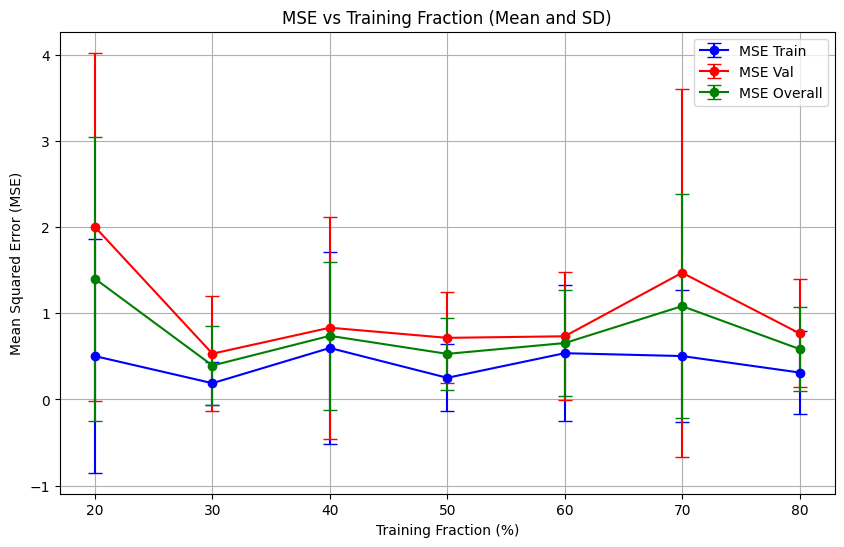

In [16]:
training_fractions = list(range(20, 81, 10))
list_avg_mse_train = [statistics.mean([model_result.mse_train for model_result in model_results_2[i]]) for i in training_fractions]
list_avg_mse_val = [statistics.mean([model_result.mse_val for model_result in model_results_2[i]]) for i in training_fractions]
list_avg_mse_overall = [statistics.mean([model_result.mse_overall for model_result in model_results_2[i]]) for i in training_fractions]
list_stdev_mse_train = [statistics.stdev([model_result.mse_train for model_result in model_results_2[i]]) for i in training_fractions]
list_stdev_mse_val = [statistics.stdev([model_result.mse_val for model_result in model_results_2[i]]) for i in training_fractions]
list_stdev_mse_overall = [statistics.stdev([model_result.mse_overall for model_result in model_results_2[i]]) for i in training_fractions]

plot_mse_results(
    x_axis="training_fraction",
    list_avg_mse_train=list_avg_mse_train,
    list_avg_mse_val=list_avg_mse_val,
    list_avg_mse_overall=list_avg_mse_overall,
    list_stdev_mse_train=list_stdev_mse_train,
    list_stdev_mse_val=list_stdev_mse_val,
    list_stdev_mse_overall=list_stdev_mse_overall
)

### 3. For the ”best” model, can you speed up the convergence without compromising the generalisation performance?

Some ways to speed up the convergence (without compromising generalisation) are: 
1. Reducing the batch size, thereby getting the batch gradient descent to be more like stochastic gradient descent in practice. 
2. Reducing the number of epochs to a certain extent (early stopping).
3. Use an adaptive learning rate such as Adam (which we have already used) instead of a fixed learning rate. 
4. Use a better weight initialization strategy, such as using he_normal.

In [6]:
model = load_MLP_regressor(n_nodes=8)

X_train, X_val, y_train, y_val = split_dataset(X, y)
history = model.fit(
    X_train, y_train, 
    validation_data=(X_val, y_val),
    epochs=200,
    batch_size=32,
    verbose=1
)

Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0985 - val_loss: 0.5088
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0583 - val_loss: 0.4569
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0442 - val_loss: 0.4249
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0425 - val_loss: 0.4104
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0420 - val_loss: 0.4061
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0400 - val_loss: 0.4039
Epoch 7/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0382 - val_loss: 0.3979
Epoch 8/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0370 - val_loss: 0.3870
Epoch 9/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0356 - val_loss: 0.3732
Epoch 10/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0342 - val_loss: 0.3597
Epoch 11/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0329 - val_loss: 0.3482
Epoch 12/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0318 - val_loss

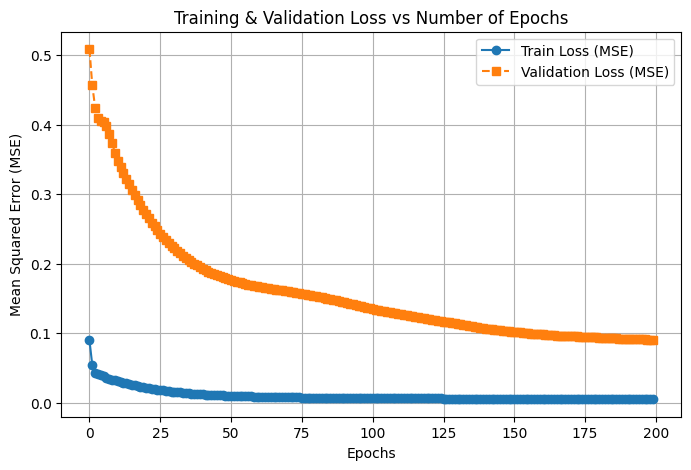

In [7]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss (MSE)', marker='o', linestyle='-')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training & Validation Loss vs Number of Epochs')
plt.legend()
plt.grid(True)
plt.show()
